# Project: Investigate tmdb-movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
tmdb movies dataset contain information about the movies from the mid-60s till 2015. Here I will answer below questions. In my analysis I will compare the data based on the segment of 5 years: 
70-74 -- 75-79 -- 80-84 -- 85-89 -- 90-94 -- 95-99 -- 2000-2004 -- 2005-2009 -- 2010-2015
I will ignore the 60s since we only have data starting from 66.
<ul>
    <li>How many movies in each segment?</li>
    <li>What is the relationship between revenue and budget?</li>
    <li>What is the relationship between revenue and runtime?</li>
    <li>What is most produced genre in each generation?</li>
</ul>


In [1]:
# Import pandas, numpy, and matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.patches as patches

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#numder of dublicated rows
sum(df.duplicated())

1

In [6]:
# count missing value for each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Initially based on the data observation:** 
<ol>
<li>There is one duplicated row which will be removed.</li>
<li>The date is not in date format but we will not need this column </li>
<li>Some of the revenue and budget values are missing, we will deal with it only in answering the 2nd question</li>
<li>Homepage, tagline, keyword, and production_companies have a lot of missing value and I will not need them in my analysis; therefore, I will drop them</li>
<li>For the genres, I will divide it into a separate column and assign it to new datafram. This data frame will only be used in analyzing the genres. since the duplication of the other columns may affect the analysis for other purposes</li>
</ol>

### Data Cleaning (Drop extra columns and null raws)


In [7]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.

#Delete the duplicated values
df.drop_duplicates()

#Delete homepage, tagline, and keywords columns
df.drop(['homepage','tagline','keywords','production_companies'],axis=1, inplace = True)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.4+ MB


In [8]:
#count the null values
df.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [9]:
#delete the null values 
df.dropna(inplace = True)
df.shape

(10725, 17)

In [10]:
#check if there are any null values
df.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10725 entries, 0 to 10865
Data columns (total 17 columns):
id                10725 non-null int64
imdb_id           10725 non-null object
popularity        10725 non-null float64
budget            10725 non-null int64
revenue           10725 non-null int64
original_title    10725 non-null object
cast              10725 non-null object
director          10725 non-null object
overview          10725 non-null object
runtime           10725 non-null int64
genres            10725 non-null object
release_date      10725 non-null object
vote_count        10725 non-null int64
vote_average      10725 non-null float64
release_year      10725 non-null int64
budget_adj        10725 non-null float64
revenue_adj       10725 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


### Data Cleaning (Split the Genres)

In [12]:
#This function split any kind of column based on the given denominator or '|' as a defult 

def split_column (df, column, splitor = '|'):
    #INPUT: dataframe and the coumn to be splited and the sperator which is '|' in defult
    #OUTPUT: new datafram that contain the splited coumn
    
    
    #create a new column that containg the number of values in each column
    df1 = df.copy() #copy of the df
    col_name = 'count_' + column #name of the new column 
    df1[col_name]= df1[column].apply(lambda x: x.count(splitor)) #asign the count of the values 

    new_rows = pd.DataFrame() #the final dataframe that contain the separated columns
    num_loop = max(pd.to_numeric(df1[col_name])) #to determan 

    i=0 
    while i <= num_loop:
        df2 = df1[df1[col_name] == i]
        df3 = df1[df1[col_name] == i]
        j=0
        while j <= i:
            df3[column] = df2[column].apply(lambda x: x.split(splitor)[j])
            new_rows = new_rows.append(df3)
            j+=1
        
        i+=1
    new_rows[col_name]= new_rows[col_name]+1
    return new_rows


In [13]:
#create new dataframe for the genres
df_genres = split_column(df,'genres')

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
#print the sorted original data to compate it with the new data   
df.sort_values(['id'])

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8088,5,tt0113101,1.234890,4000000,4300000,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,Allison Anders|Alexandre Rockwell|Robert Rodri...,It's Ted the Bellhop's first night on the job....,98,Comedy,12/25/95,293,6.4,1995,5.723867e+06,6.153158e+06
10249,6,tt0107286,0.815631,0,12136938,Judgment Night,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|Je...,Stephen Hopkins,"While racing to a boxing match, Frank, Mike, J...",110,Action|Thriller|Crime,10/15/93,36,6.4,1993,0.000000e+00,1.832034e+07
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09
4955,12,tt0266543,3.440519,94000000,864625978,Finding Nemo,Albert Brooks|Ellen DeGeneres|Alexander Gould|...,Andrew Stanton|Lee Unkrich,A tale which follows the comedic and eventful ...,100,Animation|Family,5/30/03,3692,7.4,2003,1.114231e+08,1.024887e+09
4179,13,tt0109830,6.715966,55000000,677945399,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,A man with a low IQ has accomplished great thi...,142,Comedy|Drama|Romance,7/6/94,4856,8.1,1994,8.091114e+07,9.973333e+08
2411,14,tt0169547,3.555720,15000000,356296601,American Beauty,Kevin Spacey|Annette Bening|Thora Birch|Wes Be...,Sam Mendes,"Lester Burnham, a depressed suburban father in...",122,Drama,9/15/99,1756,7.7,1999,1.963579e+07,4.664111e+08
8695,16,tt0168629,0.977410,12800000,40031879,Dancer in the Dark,BjÃ¶rk|Catherine Deneuve|David Morse|Peter Sto...,Lars von Trier,"Selma, a Czech immigrant on the verge of blind...",140,Drama|Crime|Music,5/17/00,190,7.4,2000,1.620854e+07,5.069205e+07
6869,17,tt0411267,0.546134,0,0,The Dark,Sean Bean|Maria Bello|Richard Elfyn|Maurice Ro...,John Fawcett,AdÃ¨le and her daughter Sarah are traveling on...,87,Horror|Thriller|Mystery,1/26/06,31,5.2,2006,0.000000e+00,0.000000e+00
5235,18,tt0119116,2.972972,90000000,263920180,The Fifth Element,Bruce Willis|Gary Oldman|Ian Holm|Milla Jovovi...,Luc Besson,"In 2257, a taxi driver is unintentionally give...",126,Adventure|Fantasy|Action|Thriller|Science Fiction,5/7/97,2649,7.1,1997,1.222614e+08,3.585251e+08
5131,20,tt0314412,0.282490,0,9726954,My Life Without Me,Sarah Polley|Amanda Plummer|Scott Speedman|Leo...,Isabel Coixet,A Pedro Almodovar production in which a fatall...,106,Drama|Romance,3/7/03,44,6.7,2003,0.000000e+00,1.152987e+07


In [15]:
#print genras data to compate it with the oreginal data   
 
df_genres.sort_values(['id'])

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genres
8088,5,tt0113101,1.234890,4000000,4300000,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,Allison Anders|Alexandre Rockwell|Robert Rodri...,It's Ted the Bellhop's first night on the job....,98,Comedy,12/25/95,293,6.4,1995,5.723867e+06,6.153158e+06,1
10249,6,tt0107286,0.815631,0,12136938,Judgment Night,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|Je...,Stephen Hopkins,"While racing to a boxing match, Frank, Mike, J...",110,Crime,10/15/93,36,6.4,1993,0.000000e+00,1.832034e+07,3
10249,6,tt0107286,0.815631,0,12136938,Judgment Night,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|Je...,Stephen Hopkins,"While racing to a boxing match, Frank, Mike, J...",110,Action,10/15/93,36,6.4,1993,0.000000e+00,1.832034e+07,3
10249,6,tt0107286,0.815631,0,12136938,Judgment Night,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|Je...,Stephen Hopkins,"While racing to a boxing match, Frank, Mike, J...",110,Thriller,10/15/93,36,6.4,1993,0.000000e+00,1.832034e+07,3
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Princess Leia is captured and held hostage by ...,121,Adventure,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,3
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Princess Leia is captured and held hostage by ...,121,Science Fiction,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,3
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Princess Leia is captured and held hostage by ...,121,Action,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,3
4955,12,tt0266543,3.440519,94000000,864625978,Finding Nemo,Albert Brooks|Ellen DeGeneres|Alexander Gould|...,Andrew Stanton|Lee Unkrich,A tale which follows the comedic and eventful ...,100,Animation,5/30/03,3692,7.4,2003,1.114231e+08,1.024887e+09,2
4955,12,tt0266543,3.440519,94000000,864625978,Finding Nemo,Albert Brooks|Ellen DeGeneres|Alexander Gould|...,Andrew Stanton|Lee Unkrich,A tale which follows the comedic and eventful ...,100,Family,5/30/03,3692,7.4,2003,1.114231e+08,1.024887e+09,2
4179,13,tt0109830,6.715966,55000000,677945399,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,A man with a low IQ has accomplished great thi...,142,Romance,7/6/94,4856,8.1,1994,8.091114e+07,9.973333e+08,3


<a id='eda'></a>
## Exploratory Data Analysis


In [16]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10725.000000,10725.000000,1.072500e+04,1.072500e+04,10725.000000,10725.000000,10725.000000,10725.000000,1.072500e+04,1.072500e+04
mean,65182.327925,0.652852,1.481473e+07,4.034253e+07,102.502471,219.933054,5.964317,2001.255012,1.777804e+07,5.203541e+07
std,91470.421976,1.005025,3.107129e+07,1.176814e+08,30.458857,578.955633,0.930166,12.822147,3.447315e+07,1.454606e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10546.000000,0.210766,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20309.000000,0.387304,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73937.000000,0.721548,1.600000e+07,2.500526e+07,112.000000,148.000000,6.600000,2011.000000,2.113258e+07,3.476553e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


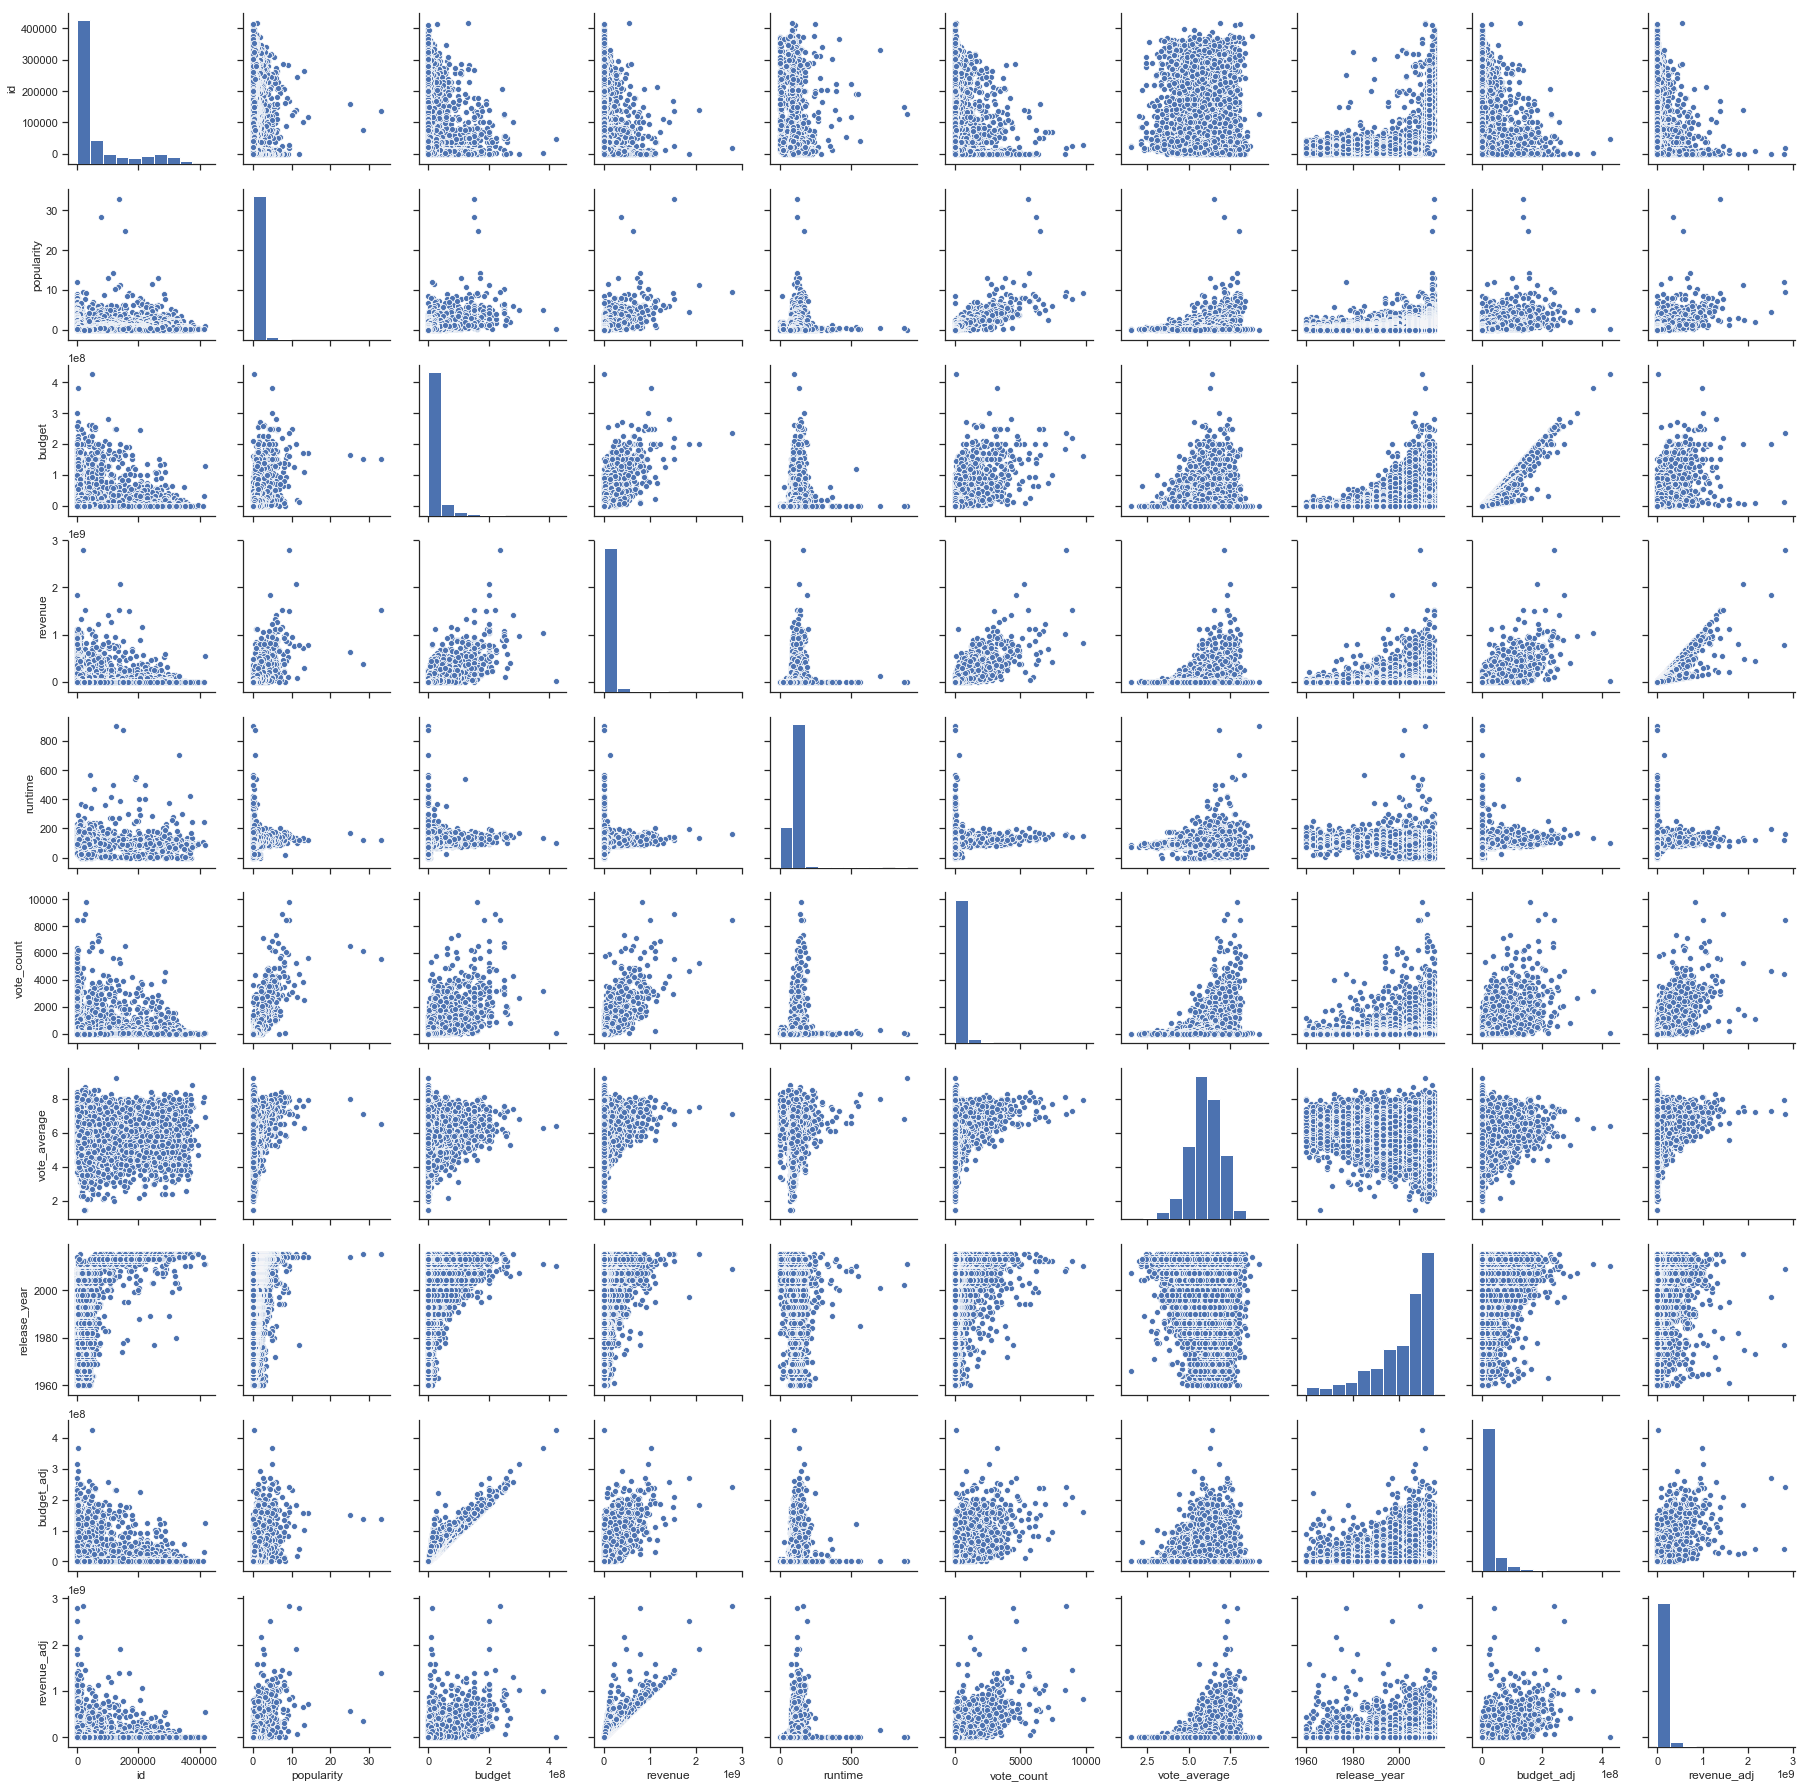

In [17]:
#general pictue for the data
sns.set(style="ticks");
sns.pairplot(df);

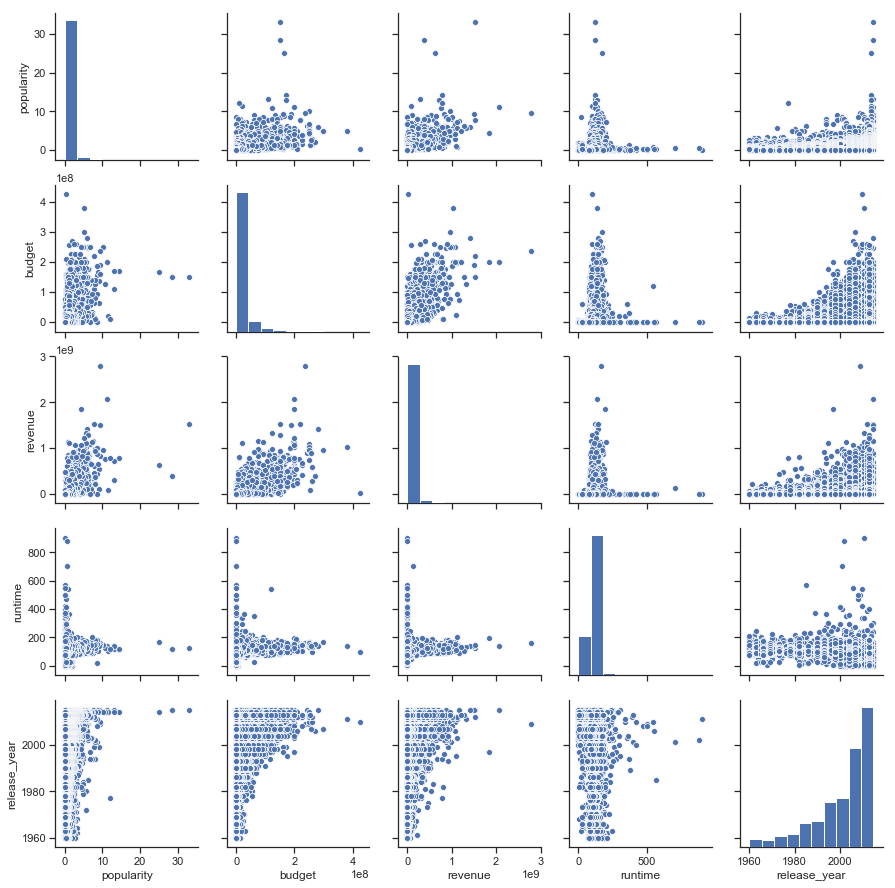

In [18]:
#see the chart for intrested data
sns.pairplot(df[['popularity','budget','revenue','cast','director','runtime','genres','release_year']]);

>From observing the pairplot, there is a strong relationship between the runtime and revenue. I will add this question in the introduction.  

### Research Question 1 (How many movies in each segment?)

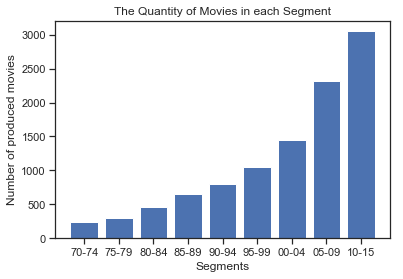

In [19]:
#divided the year into 5 years segments
df_segments = df.groupby(pd.cut(df['release_year'], np.arange(1970, 2016, 5))).count()['id']

ind = np.arange(len(df_segments))

plt.bar(ind, df_segments);

labels = ['70-74', '75-79', '80-84', '85-89', '90-94', '95-99','00-04', '05-09', '10-15']
plt.title('The Quantity of Movies in each Segment')
plt.xlabel('Segments')
plt.ylabel('Number of produced movies')

plt.xticks(ind, labels);

>This section shows the number of movies in each segment: We exclude the 60s since it starts from 1966 and also that will not affect the needed result
>The graph shows the relationship between the number of movies over a segments of yeasr. Each par represent the number of movies in a period of 5 years. The number of movies remain increasing over the years especially in the 2000s.

### Research Question 2  (What is the relationship between revenue and budget?)

#### The result with the actual columns (revenue and budget)

In [20]:
#exclude the 0s value 
df_nozeros = df.query('revenue > 0 & budget >0')
df_segments = df_nozeros.groupby(pd.cut(df_nozeros['release_year'], np.arange(1970, 2016, 5)))

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


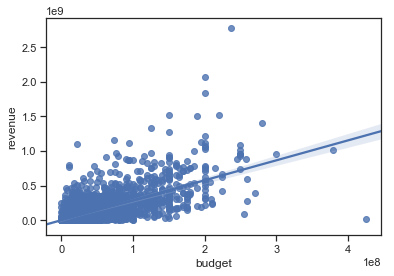

In [21]:
sns.regplot(x=df_nozeros['budget'], y=df_nozeros['revenue'])

>Before we see the relation per segmen here we the overall relation beween the budget and revenue. General speaking the higher the budget the higher the revenue. However, the proportion of high budget movies is small.

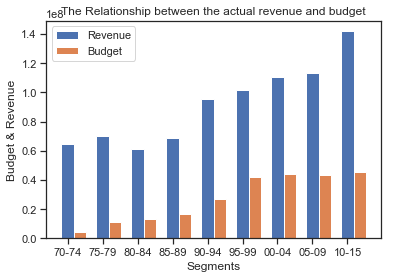

In [22]:
#The Relationship between the actual revenue and budget

#calculate the mean revenue and budget for each 5 years period 
revenue_mean = df_segments.mean()['revenue']
budget_mean = df_segments.mean()['budget']

#draw the graph
ind = np.arange(len(revenue_mean))
labels = ['70-74', '75-79', '80-84', '85-89', '90-94', '95-99','00-04', '05-09', '10-15']
width = 0.35

plt.bar(ind, revenue_mean, width, label = 'Revenue');
plt.bar(ind + width , budget_mean, width, label = 'Budget');

plt.title('The Relationship between the actual revenue and budget')
plt.xlabel('Segments')
plt.ylabel('Budget & Revenue')

plt.xticks(ind, labels);
plt.legend()

>Using the actual revenue and budget values,the relationship based on the year segment is positive. we can see that the budget and revenue increased over time, except in the 80s there was a small drop in the revenue.
Starting from 2000 the budget did not increase but the revenue increased.

#### Result with the adjusted columns

In [23]:
#exclude the 0s value 
df_nozeros_adj = df.query('revenue_adj > 0 & budget_adj >0')
#create column for the different between revenue and budget
df_nozeros_adj['Different_adj'] = (df['revenue_adj']-df['budget_adj'])
df_segments_adj = df_nozeros_adj.groupby(pd.cut(df_nozeros['release_year'], np.arange(1970, 2016, 5)))

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


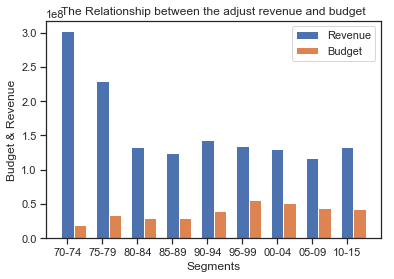

In [24]:
#The Relationship between the adjust revenue and budget

#calculate the mean adjusted revenue and budget for each 5 years period 
revenue_mean = df_segments_adj.mean()['revenue_adj']
budget_mean = df_segments_adj.mean()['budget_adj']

#Draw the graph
ind = np.arange(len(revenue_mean)) #x value
labels = ['70-74', '75-79', '80-84', '85-89', '90-94', '95-99','00-04', '05-09', '10-15'] #labels for x axis
width = 0.35

plt.bar(ind, revenue_mean, width, label = 'Revenue');
plt.bar(ind + width , budget_mean, width, label = 'Budget');

plt.title('The Relationship between the adjust revenue and budget')
plt.xlabel('Segments')
plt.ylabel('Budget & Revenue')

plt.xticks(ind, labels);
plt.legend()

>Considering the adjusted value of the revenue and budjet values, The revenue was the highest and the budgets was the lowest. Then the revenue start to drop till the 90s the values start to be almost stabile.

### Research Question 3  (What is the relationship between revenue and runtime?)

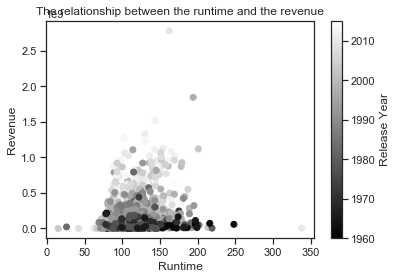

In [25]:
plt.scatter(df_nozeros_adj['runtime'], df_nozeros_adj['revenue'], c= df_nozeros_adj['release_year']);

cbar = plt.colorbar()
cbar.set_label('Release Year')

plt.title('The relationship between the runtime and the revenue');
plt.xlabel('Runtime');
plt.ylabel('Revenue');

plt.gray()

>This graph shows the relationship between runtime and revenue. The color of the bubbles is based on the year period as it shows in the colorbar. The most profitable movies are around 125 minutes.

### Research Question 4 (What is most produced genre in each generation?)

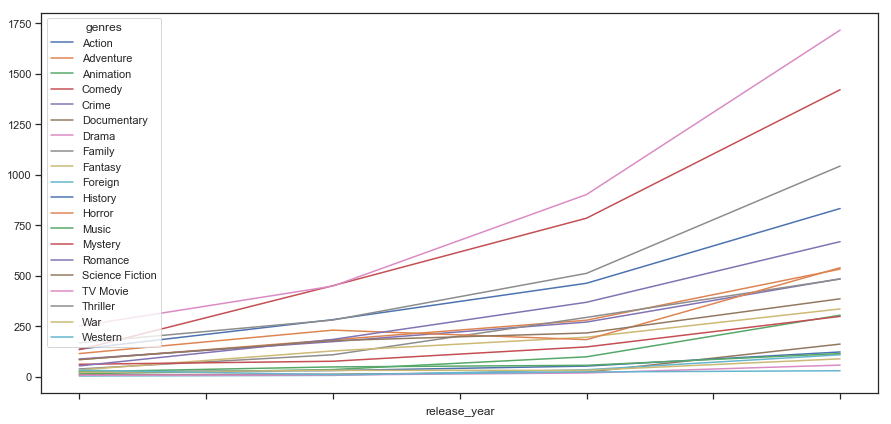

In [26]:
labels = ['70-79', '80-89', '90-99','00-09']
ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(15,7))

ax.set_xticklabels(labels)
df_genres.groupby([pd.cut(df_genres['release_year'], np.arange(1970, 2016, 10)),'genres']).count()['id'].unstack().plot(ax =ax)


> This graph showa the number of movies is each genra over the time. The drama is all-time most produced movies followed by the comedy. The gap between them and the other movies is increasing over time which shows that the increase in movie production did not increase equally between all kind of movies.

### Research Question 5 (What is the relationship between the Revenue from Budget for each genre?)

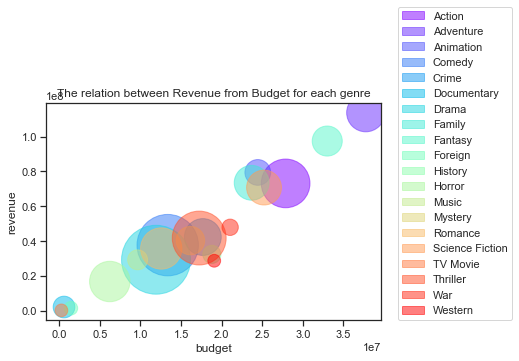

In [31]:
#The relation between Revenue from Budget for each genre.
#Bubble size represents the number of movies in each genre.
grouped_df= df_genres.groupby('genres')
x = grouped_df.mean()['budget']
y = grouped_df.mean()['revenue']
z = grouped_df.count()['id']

colors = cm.rainbow(np.linspace(0, 1, len(x)))

#figure 
plt.scatter(x, y,z ,c= colors, alpha = 0.5,)
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('The relation between Revenue from Budget for each genre');

#legend 
colorList=[]
i=0

for key, item in grouped_df:
   colorList.append(patches.Patch(color = colors[i], alpha = 0.5, label = key));
   i+=1

plt.legend(handles = colorList, loc =(1.05,0))

plt.show();

>The graph shows the relation between budget and revenue in each genra. The size of the bubbles represent the number of movies in each genra.

>Even though the Drama is the highest number of movies but it not high in revenue.
Adventure moves have the highest cost the highest revenue
there is a strong relationship between cost and revenue per genre. However, there is no relation between revenue and number of movies. Most of the moves cost between 1 to 2 million and in return, the revenue is between 1 to 5 million 


<a id='conclusions'></a>
## Conclusions

>Based on the previous analysis we can ansewr our questions as following:

>Q1: How many movies in each segment? The number of movies is increasing over time. The peak increment compares to the previous segment is from 2000 to 2005. 

>Q2: What is the relationship between revenue and budget? 
The higher the budget the higher the revenue in most cases. However, the number of movies with high budget is not high. Based on the data per segments, considering the revenue and profit are decreasing while the budget gently increased untill 1995 where it start to be almost the same. 

>Q3 What is the relationship between revenue and runtime? Most of the moves are between 60 and 200 minutes. The closer the runtime to 150 the better the revenue. 

>Q4 What is most produced genre in each generation? the production of drama represents the highest proportion followed by the comedy. Drama, Comedy, Thriller, Action, and Romance show the highest increase in production respectively. Even though the increase is almost in all the category, this result shows that the gap between the past and now is not equally distributed between all the genres. Some genres have increased massively and other stays at the same level. 

>Q5: What is the relationship between the Revenue from Budget for each genre?
there is a strong relationship between budget and revenue per genre but middle budget and middle revenue shows the highest number of prodused movies. Adventure moves have the highest cost the highest revenue. Most of the moves cost between 1 to 2 million and in return, the revenue is between 1 to 5 million.


>Limitation:
* the dataset represents around 10K movies which are not enough to give a general idea about the movies.
* There is a lot of 0 values in revenue and budget which may affect the result. 
* the way of calculating the adjusted values does not explaned.
* There is not a calculation of the profit which may be affected by other thinges not only the budget and revenue
* There is no explanation for the popularity column. what does 0 or 32 mean? Which make me exclude all the questions related to this column.
* Most of the movies have more than one genre. While this compination may affect the result, my analysis seperate the genra to make an overall view for each genre. 


### reference:
<li>Some of stackoverflow and matplotlib.org</li>
<li>https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html </li><li>https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html </li>
